# Explore MODIS coefficients

In [35]:
# imports
import h5py
import os
import numpy as np

import pandas
import seaborn as sns

# Load file

In [36]:
st_coeff_file = os.path.join(os.getenv('OS_SST'), 'MODIS_L2', 'Scattering',
                             'MODIS_2009_ST_coeff.h5')

In [37]:
f = h5py.File(st_coeff_file, 'r')

In [38]:
f.keys()

<KeysViewHDF5 ['I02', 'S0', 'S1', 'S2']>

In [39]:
n_explore= 100000

# Explore 

## $<|I_0|^2>$

In [40]:
df = pandas.DataFrame()
df['I02'] = f['I02'][:n_explore]

<Axes: xlabel='I02', ylabel='Count'>

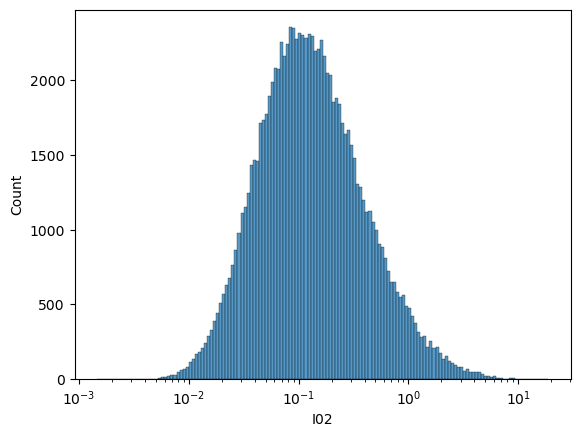

In [41]:
sns.histplot(df, x='I02', log_scale=True)

##  $S_1$

### Average over $\ell$ for $s_1$

In [43]:
S1_iso = f['S1'][:n_explore].mean(-1)
S1_iso.shape

(100000, 5)

In [44]:
for J in range(5):
    df[f's1_{J}'] = S1_iso[:,J]

<Axes: xlabel='s1_0', ylabel='Count'>

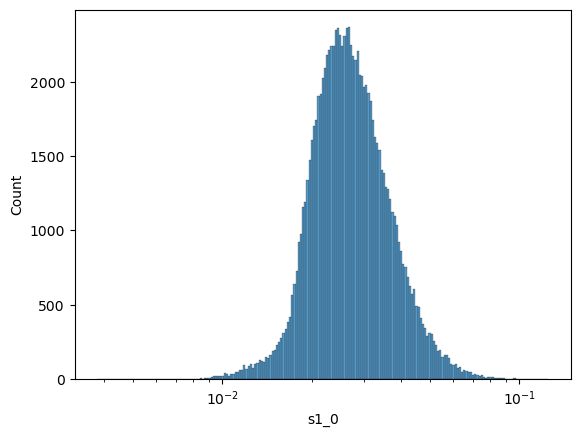

In [45]:
sns.histplot(df, x='s1_0', log_scale=True)

<Axes: xlabel='s1_3', ylabel='Count'>

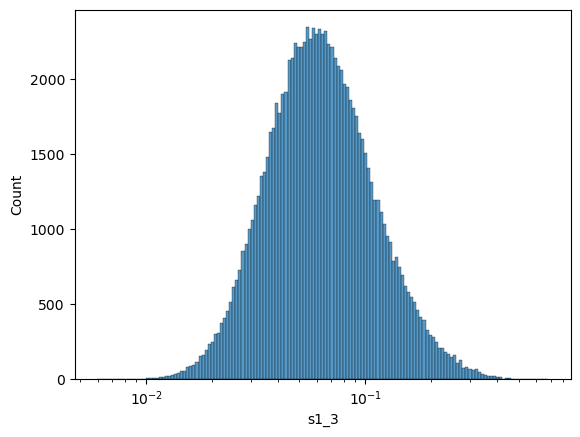

In [46]:
sns.histplot(df, x='s1_3', log_scale=True)

## Average over them all

In [47]:
avg_s1 = np.mean(S1_iso, axis=0)

In [48]:
avg_s1

array([0.02833967, 0.03727592, 0.05218284, 0.07342343, 0.09599815],
      dtype=float32)

## 2D plots

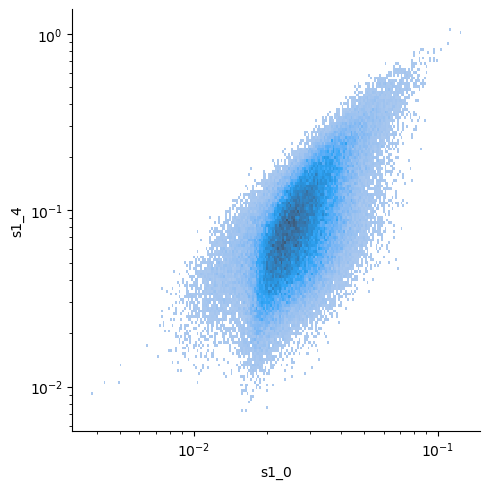

In [49]:
sns.displot(df, x='s1_0', y='s1_4', log_scale=True)

# S2

## Calculate

In [50]:
S2 = f['S2'][:n_explore]

In [54]:
J=5
L=4
S2_iso = np.zeros((n_explore,J,J,L))
for l1 in range(L):
    for l2 in range(L):
        S2_iso [:,:,:,(l2-l1)%L] += S2 [:,:,:,l1,l2]
S2_iso  /= L

In [55]:
S2_iso.shape

(100000, 5, 5, 4)

In [56]:
s21 = S2_iso.mean(-1) / S1_iso[:,:,None]
s22 = S2_iso[:,:,:,0] / S2_iso[:,:,:,L//2]

In [58]:
s21.shape, s22.shape

((100000, 5, 5), (100000, 5, 5))

In [68]:
avg_s21 = np.nanmean(s21, axis=(-1,-2))
avg_s22 = np.nanmean(s22, axis=(-1,-2))

In [69]:
avg_s22.shape

(100000,)

## Explore

In [70]:
df['s21'] = avg_s21
df['s22'] = avg_s22

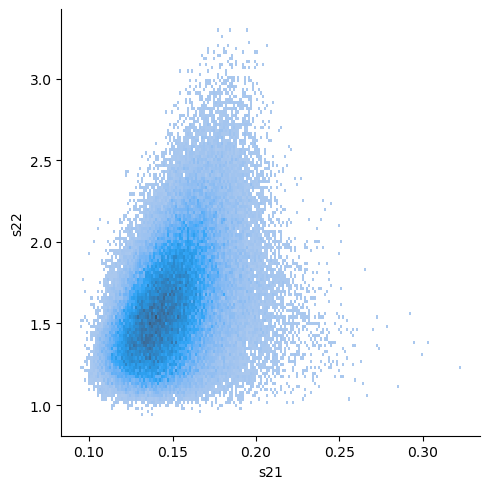

In [71]:
sns.displot(df, x='s21', y='s22')